# Parte II - Convolutional Neural Networks con MNIST

## Importación de librerías y configurar entorno

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random

# Para reproducibilidad
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)



In [ ]:
# identificación de (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)

Usando dispositivo: cpu


## Carga de dataset MNIST

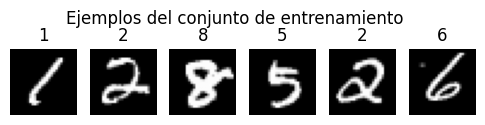

In [22]:
# Transformación: tensor y normalización (0–1)
transform = transforms.ToTensor()

mnist_train = datasets.MNIST(
    root="../data", train=True, download=True, transform=transform
)
mnist_test = datasets.MNIST(
    root="../data", train=False, download=True, transform=transform
)

# DataLoaders
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=1000, shuffle=False)

# Ejemplo visual
images, labels = next(iter(train_loader))
plt.figure(figsize=(6, 1.5))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"{labels[i].item()}")
    plt.axis("off")
plt.suptitle("Ejemplos del conjunto de entrenamiento")
plt.show()


## Definición de modelos

> Para este trabajo, se implementan tres arquitecturas base con el fin de analizar su desempeño en clasificación de imágenes.
> - *Primero, se entrena un MLP simple, que actúa como referencia sin convoluciones.*
> - *Luego, una CNN básica, que introduce capas convolucionales para captar patrones espaciales.*
> - *Finalmente, una CNN mejorada con más profundidad y técnicas de regularización, para evaluar mejoras en convergencia y precisión.*

### Modelo 1: Red totalmente conectada (MLP)

Convierte cada imagen de 28×28 píxeles en un vector y pasa la información por capas totalmente conectadas.

In [11]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        return self.fc(x)


### Modelo 2: CNN básica

Usa convoluciones y max pooling para detectar bordes, formas y patrones en distintas zonas de la imagen.

In [12]:
class CNN_Basica(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),    # 28→14
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)     # 14→7
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)


### Modelo 3: CNN con BatchNorm y Dropout

Se agrega filtros, Batch Normalization (para estabilizar el aprendizaje) y Dropout (para evitar sobreajuste).
Es más profunda y robusta.

In [13]:
class CNN_Mejorada(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)


## Función de entrenamiento y evaluación

> Se usa las funciones genéricas de *nn_utils.py*
> Con CrossEntropyLoss y Adam con tasa 0.001.

In [14]:
from utils.nn_utils import train_model, plot_training_curves

EPOCHS = 10
LR = 1e-3


## Entrenamiento y comparación de modelos


> Se entrena cada modelo, se registra cada curvas de pérdida y accuracy, y por ultimo se grafica para comparar desempeño.

### Entrenamiento de MLP: (Modelo 1)

Época 1/10:   0%|          | 0/938 [00:00<?, ?it/s]

Época 1/10: 100%|██████████| 938/938 [00:29<00:00, 31.79it/s]


Época 1/10 — Pérdida: 0.2889, Acc test: 0.9592


Época 2/10: 100%|██████████| 938/938 [00:27<00:00, 33.68it/s]


Época 2/10 — Pérdida: 0.1106, Acc test: 0.9650


Época 3/10: 100%|██████████| 938/938 [00:22<00:00, 41.89it/s]


Época 3/10 — Pérdida: 0.0717, Acc test: 0.9700


Época 4/10: 100%|██████████| 938/938 [00:22<00:00, 41.97it/s]


Época 4/10 — Pérdida: 0.0522, Acc test: 0.9765


Época 5/10: 100%|██████████| 938/938 [00:22<00:00, 41.76it/s]


Época 5/10 — Pérdida: 0.0393, Acc test: 0.9766


Época 6/10: 100%|██████████| 938/938 [00:24<00:00, 37.82it/s]


Época 6/10 — Pérdida: 0.0328, Acc test: 0.9796


Época 7/10: 100%|██████████| 938/938 [00:22<00:00, 40.87it/s]


Época 7/10 — Pérdida: 0.0231, Acc test: 0.9793


Época 8/10: 100%|██████████| 938/938 [00:23<00:00, 39.84it/s]


Época 8/10 — Pérdida: 0.0214, Acc test: 0.9760


Época 9/10: 100%|██████████| 938/938 [00:24<00:00, 37.96it/s]


Época 9/10 — Pérdida: 0.0184, Acc test: 0.9762


Época 10/10: 100%|██████████| 938/938 [00:39<00:00, 23.49it/s]


Época 10/10 — Pérdida: 0.0145, Acc test: 0.9805


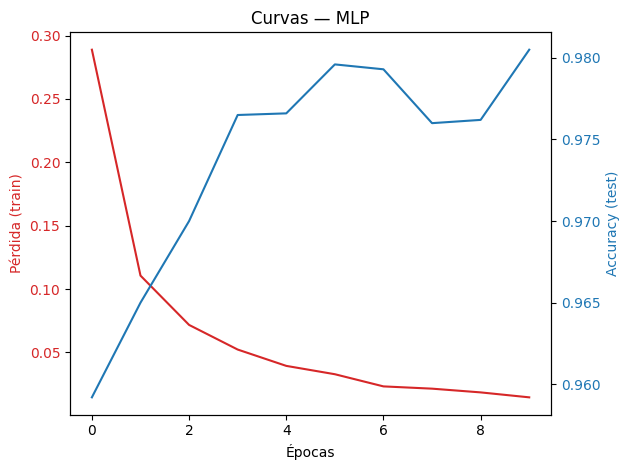

In [15]:
mlp = MLP()
history_mlp = train_model(mlp, train_loader, test_loader, epochs=EPOCHS, lr=LR, device=device)
plot_training_curves(history_mlp, title="Curvas — MLP")


- La red MLP converge rápidamente, pasando de un 95.9% en la primera época a 98.0% en la décima.
- La pérdida (loss) disminuye de manera constante, lo que indica un buen aprendizaje.
- La curva de accuracy se satura alrededor del 98%, un valor muy competitivo para una red densa sin convoluciones.
> El MLP logra un desempeño sólido y estable, demostrando que una red totalmente conectada puede aprender patrones básicos en MNIST, pero su precisión se ve limitada por la ausencia de convoluciones.

### Entrenamiento de CNN básica: (Modelo 2)

Época 1/10: 100%|██████████| 938/938 [01:17<00:00, 12.04it/s]


Época 1/10 — Pérdida: 0.2146, Acc test: 0.9804


Época 2/10: 100%|██████████| 938/938 [01:24<00:00, 11.15it/s]


Época 2/10 — Pérdida: 0.0610, Acc test: 0.9874


Época 3/10: 100%|██████████| 938/938 [01:21<00:00, 11.44it/s]


Época 3/10 — Pérdida: 0.0421, Acc test: 0.9869


Época 4/10: 100%|██████████| 938/938 [01:31<00:00, 10.20it/s]


Época 4/10 — Pérdida: 0.0335, Acc test: 0.9904


Época 5/10: 100%|██████████| 938/938 [01:01<00:00, 15.32it/s]


Época 5/10 — Pérdida: 0.0267, Acc test: 0.9911


Época 6/10: 100%|██████████| 938/938 [01:06<00:00, 14.18it/s]


Época 6/10 — Pérdida: 0.0198, Acc test: 0.9906


Época 7/10: 100%|██████████| 938/938 [01:00<00:00, 15.44it/s]


Época 7/10 — Pérdida: 0.0170, Acc test: 0.9905


Época 8/10: 100%|██████████| 938/938 [01:09<00:00, 13.50it/s]


Época 8/10 — Pérdida: 0.0139, Acc test: 0.9906


Época 9/10: 100%|██████████| 938/938 [01:02<00:00, 15.00it/s]


Época 9/10 — Pérdida: 0.0110, Acc test: 0.9902


Época 10/10: 100%|██████████| 938/938 [01:05<00:00, 14.33it/s]


Época 10/10 — Pérdida: 0.0092, Acc test: 0.9869


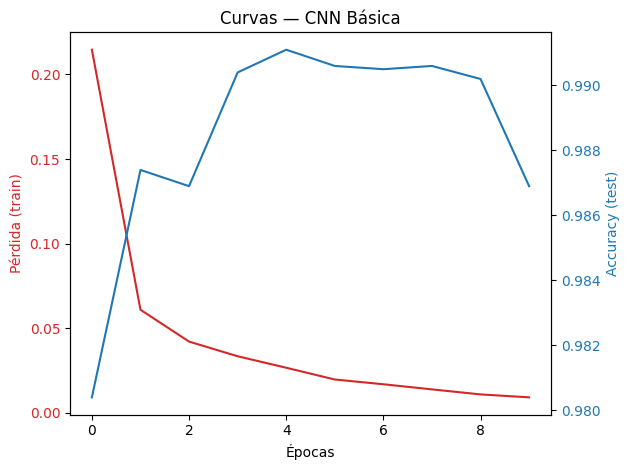

In [16]:
cnn_basic = CNN_Basica()
history_cnn_basic = train_model(cnn_basic, train_loader, test_loader, epochs=EPOCHS, lr=LR, device=device)
plot_training_curves(history_cnn_basic, title="Curvas — CNN Básica")


Desde la primera época ya supera al MLP (98.0%), lo que confirma que las convoluciones capturan mejor las formas y trazos de los dígitos.
- La pérdida cae drásticamente (de 0.21 a 0.009), mostrando un entrenamiento eficiente.
- A partir de la época 5, la accuracy se mantiene estable (99%), aunque el pequeño descenso final se debe a ligeras variaciones por el optimizador Adam.

> La CNN básica mejora la generalización al aprovechar la información espacial de los píxeles. Logra un desempeño cercano al 99%, mostrando cómo las convoluciones reducen la complejidad de parámetros y mejoran la eficiencia del aprendizaje.

### Entrenamiento de CNN mejorada: (Modelo 3)

Época 1/10: 100%|██████████| 938/938 [02:47<00:00,  5.59it/s]


Época 1/10 — Pérdida: 0.1831, Acc test: 0.9856


Época 2/10: 100%|██████████| 938/938 [04:00<00:00,  3.90it/s]


Época 2/10 — Pérdida: 0.0815, Acc test: 0.9865


Época 3/10: 100%|██████████| 938/938 [02:35<00:00,  6.03it/s]


Época 3/10 — Pérdida: 0.0672, Acc test: 0.9901


Época 4/10: 100%|██████████| 938/938 [02:14<00:00,  6.98it/s]


Época 4/10 — Pérdida: 0.0552, Acc test: 0.9900


Época 5/10: 100%|██████████| 938/938 [02:23<00:00,  6.55it/s]


Época 5/10 — Pérdida: 0.0503, Acc test: 0.9921


Época 6/10: 100%|██████████| 938/938 [02:11<00:00,  7.12it/s]


Época 6/10 — Pérdida: 0.0433, Acc test: 0.9917


Época 7/10: 100%|██████████| 938/938 [02:24<00:00,  6.47it/s]


Época 7/10 — Pérdida: 0.0389, Acc test: 0.9909


Época 8/10: 100%|██████████| 938/938 [02:21<00:00,  6.61it/s]


Época 8/10 — Pérdida: 0.0345, Acc test: 0.9927


Época 9/10: 100%|██████████| 938/938 [02:23<00:00,  6.52it/s]


Época 9/10 — Pérdida: 0.0327, Acc test: 0.9928


Época 10/10: 100%|██████████| 938/938 [02:20<00:00,  6.69it/s]


Época 10/10 — Pérdida: 0.0300, Acc test: 0.9924


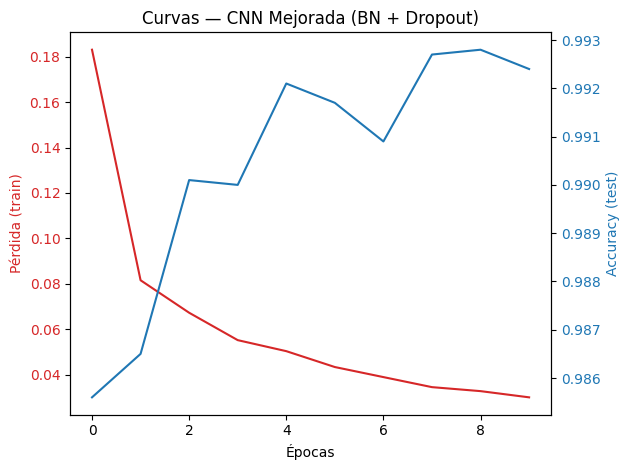

In [17]:
cnn_mejorada = CNN_Mejorada()
history_cnn_mej = train_model(cnn_mejorada, train_loader, test_loader, epochs=EPOCHS, lr=LR, device=device)
plot_training_curves(history_cnn_mej, title="Curvas — CNN Mejorada (BN + Dropout)")


Este modelo es el más profundo y estable: la pérdida desciende suavemente, sin saltos bruscos.
- El accuracy supera el 99% sostenidamente desde la época 5.
- El tiempo de entrenamiento es mayor (Aprox:2–4 min por época), pero se observa que, el resultado es la mejor precisión y estabilidad.
> La CNN mejorada logra el mejor balance entre capacidad y regularización. Gracias a BatchNorm y Dropout, mantiene una precisión superior al 99.2% con buena estabilidad y sin sobreajuste evidente.

## Comparación de accuracy final de los modelos

> Se evalua cada modelo en el conjunto de prueba

In [33]:
from utils.nn_utils import evaluate_model

acc_mlp  = evaluate_model(mlp,  test_loader, device)
acc_cnn  = evaluate_model(cnn_basic, test_loader, device)
acc_mej  = evaluate_model(cnn_mejorada, test_loader, device)

print(f"Accuracy final MLP:         {acc_mlp:.4f}")
print(f"Accuracy final CNN Básica:  {acc_cnn:.4f}")
print(f"Accuracy final CNN Mejorada:{acc_mej:.4f}")


Accuracy final MLP:         0.9805
Accuracy final CNN Básica:  0.9869
Accuracy final CNN Mejorada:0.9924


Se implementaron tres arquitecturas de redes neuronales para la clasificación del conjunto MNIST.
> - El modelo MLP, aunque simple, logró una precisión del 98.0%, demostrando que las redes densas pueden capturar patrones de forma efectiva.
> - Al incorporar convoluciones en la CNN básica, la precisión aumentó hasta el 98.7–99.1%, evidenciando que las capas > > convolucionales extraen características espaciales más relevantes de las imágenes.
> - Finalmente, la CNN mejorada con Batch Normalization y Dropout alcanzó un rendimiento óptimo del 99.2%, mostrando una mejor estabilidad y generalización sin sobreajuste.

> En suma, Los resultados muestran que las CNN superan al MLP porque aprovechan mejor la estructura de las imágenes Además, las técnicas de regularización hacen que los modelos sean más estables y precisos para reconocimientos visuales.

## Guardado de resultados y curvas

In [34]:
import json
from pathlib import Path

OUT = Path("../report/resultados")
OUT.mkdir(parents=True, exist_ok=True)

summary = {
    "MLP": acc_mlp,
    "CNN_Basica": acc_cnn,
    "CNN_Mejorada": acc_mej
}
with open(OUT / "accuracy_modelos.json", "w") as f:
    json.dump(summary, f, indent=4)

print("Resultados guardados en report/resultados/accuracy_modelos.json")


Resultados guardados en report/resultados/accuracy_modelos.json
